# Wine데이터로 K-Means Cluster와 실루엣 분석해보기

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### Wine 데이터가져오기

In [2]:
from sklearn.datasets import load_wine
wine = load_wine()

In [3]:
wineDF = pd.DataFrame(data=wine.data, columns=wine.feature_names)
wineDF.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [4]:
wine.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

### K-Means 생성/학습

In [5]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, random_state=2021)
kmeans.fit(wineDF)

KMeans(n_clusters=3, random_state=2021)

In [6]:
wineDF['target'] = wine.target      # 실제 target class
wineDF['cluster'] = kmeans.labels_  # Clustering 결과 도출된 class
wineDF.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target,cluster
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0,1


In [7]:
# target과 cluster로 그룹화해보기
clustering_result = wineDF.groupby(['target','cluster']).count()
clustering_result.head()

alcohol  malic_acid  ash  alcalinity_of_ash  magnesium  \
target cluster                                                           
0      0             46          46   46                 46         46   
       1             13          13   13                 13         13   
1      0              1           1    1                  1          1   
       1             20          20   20                 20         20   
       2             50          50   50                 50         50   

                total_phenols  flavanoids  nonflavanoid_phenols  \
target cluster                                                    
0      0                   46          46                    46   
       1                   13          13                    13   
1      0                    1           1                     1   
       1                   20          20                    20   
       2                   50          50                    50   

                proanthocyanins  color_intensity  hue  \
target cluster                                          
0      0                     46               46   46   
       1                     13               13   13   
1      0                      1                1    1   
       1                     20               20   20   
       2                     50               50   50   

                od280/od315_of_diluted_wines  proline  
target cluster                                         
0      0                                  46       46  
       1                                  13       13  
1      0                                   1        1  
       1                                  20       20  
       2                                  50       50

### 실루엣 분석해보기

In [8]:
# wine 모든 개별 데이터에 대해서 실루엣 계수값을 구함
from sklearn.metrics import silhouette_samples, silhouette_score

score_samples = silhouette_samples(wine.data, wineDF.cluster)
wineDF['실루엣 계수'] = score_samples
wineDF.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target,cluster,실루엣 계수
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0,0,0.516178
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0,0,0.482042
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0,0,0.684513
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0,0,0.593218
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0,1,0.688007


In [9]:
# 실루엣 스코어
silhouette_score(wine.data, wineDF.cluster)

0.5711381937868844

### 클러스터별 실루엣계수 시각화

In [10]:
import matplotlib.cm as cm
import math

def visualize_silhouette(cluster_lists, X_features):    
    # 입력값으로 클러스터링 갯수들을 리스트로 받아서, 각 갯수별로 클러스터링을 적용하고 실루엣 개수를 구함
    n_cols = len(cluster_lists)
    
    # plt.subplots()으로 리스트에 기재된 클러스터링 수만큼의 sub figures를 가지는 axs 생성 
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)
    
    # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 실루엣 개수 시각화
    for ind, n_cluster in enumerate(cluster_lists):
        
        # KMeans 클러스터링 수행하고, 실루엣 스코어와 개별 데이터의 실루엣 값 계산. 
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(X_features)
        
        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)
        
        y_lower = 10
        axs[ind].set_title('Number of Cluster : '+ str(n_cluster)+'\n' \
                          'Silhouette Score :' + str(round(sil_avg,3)) )
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])  # Clear the yaxis labels / ticks
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])
        
        # 클러스터링 갯수별로 fill_betweenx( )형태의 막대 그래프 표현. 
        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()
            
            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i
            
            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                                facecolor=color, edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10
            
        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")

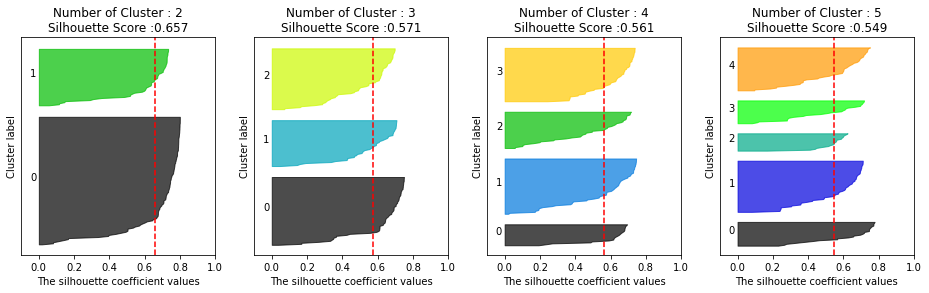

In [11]:
visualize_silhouette([2,3,4,5], wine.data)

### 군집화 결과를  PCA로 차원 축소하여 시각화

- 정규화 후 차원축소

In [12]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
scaler = StandardScaler()
wine_std = scaler.fit_transform(wine.data)
# 2차원 축소
pca = PCA(n_components=2)
wine_pca = pca.fit_transform(wine_std)

In [13]:
wineDF['pca_x'] = wine_pca[:, 0]
wineDF['pca_y'] = wine_pca[:, 1]
wineDF.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target,cluster,실루엣 계수,pca_x,pca_y
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0,0,0.516178,3.316751,-1.443463
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0,0,0.482042,2.209465,0.333393
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0,0,0.684513,2.516740,-1.031151
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0,0,0.593218,3.757066,-2.756372
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0,1,0.688007,1.008908,-0.869831


- 정규화 안하고 차원축소

In [14]:
pca = PCA(n_components=2)
wine_nostd_pca = pca.fit_transform(wine.data)
wineDF['nostd_pca_x'] = wine_nostd_pca[:, 0]
wineDF['nostd_pca_y'] = wine_nostd_pca[:, 1]
wineDF.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target,cluster,실루엣 계수,pca_x,pca_y,nostd_pca_x,nostd_pca_y
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0,0,0.516178,3.316751,-1.443463,318.562979,21.492131
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0,0,0.482042,2.209465,0.333393,303.097420,-5.364718
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0,0,0.684513,2.516740,-1.031151,438.061133,-6.537309
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0,0,0.593218,3.757066,-2.756372,733.240139,0.192729
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0,1,0.688007,1.008908,-0.869831,-11.571428,18.489995


- 원데이터와 클러스터데이터 비교하기

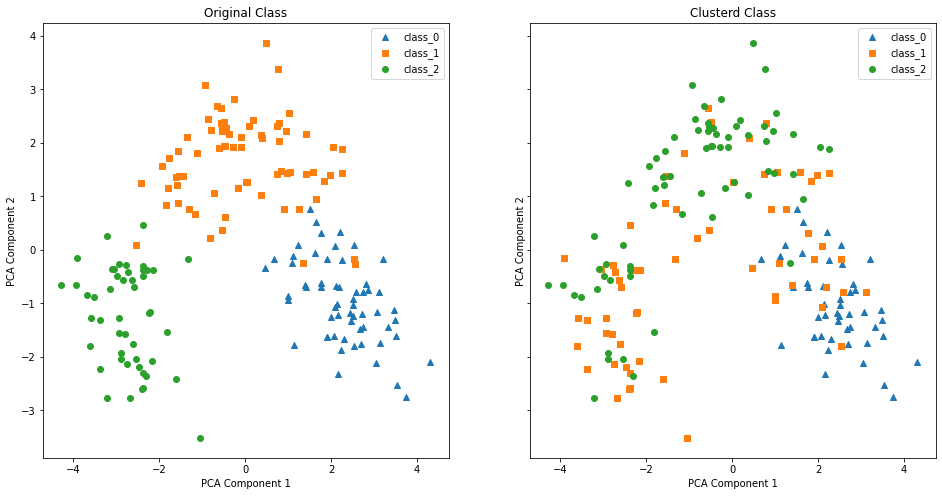

In [15]:
# 정규화한 경우

f, (ax1, ax2) = plt.subplots(figsize=(16,8), ncols=2, nrows=1, sharey=True)
columns = ['target','cluster']
markers=['^','s','o']
asx = [ax1,ax2]
for i,column in enumerate(columns):
    for k, marker in enumerate(markers):
        x_axis_data = wineDF[wineDF[column]==k]['pca_x']
        y_axis_data = wineDF[wineDF[column]==k]['pca_y']
        row, col = int(k/2), k%2
        asx[i].scatter(x_axis_data, y_axis_data, marker=marker, label=wine.target_names[k])
        asx[i].legend()
        asx[i].set_xlabel('PCA Component 1')
        asx[i].set_ylabel('PCA Component 2')
        if i == 0:
            asx[i].set_title('Original Class')
        else:
            asx[i].set_title('Clusterd Class')
plt.show()

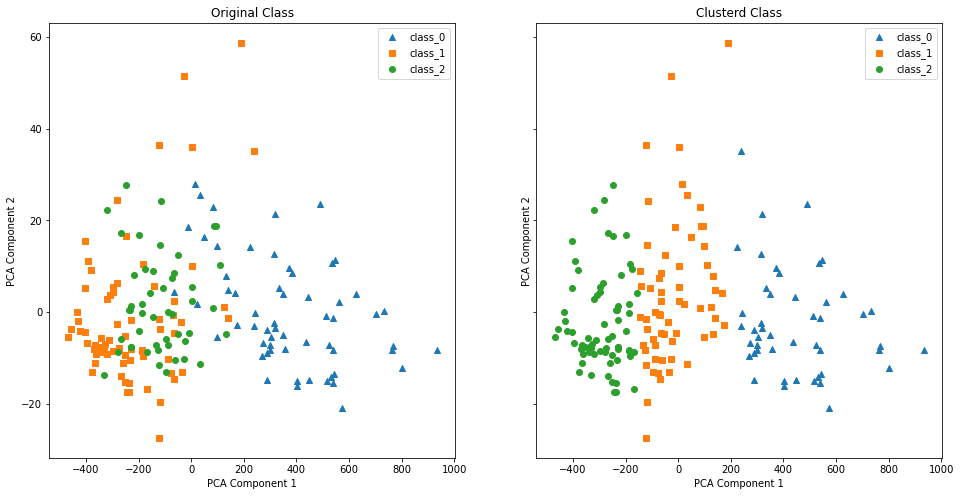

In [17]:
# 정규화 하지 않은 경우

f, (ax1, ax2) = plt.subplots(figsize=(16,8), ncols=2, nrows=1, sharey=True)
columns = ['target','cluster']
markers=['^','s','o']
asx = [ax1,ax2]
for i,column in enumerate(columns):
    for k, marker in enumerate(markers):
        x_axis_data = wineDF[wineDF[column]==k]['nostd_pca_x']
        y_axis_data = wineDF[wineDF[column]==k]['nostd_pca_y']
        row, col = int(k/2), k%2
        asx[i].scatter(x_axis_data, y_axis_data, marker=marker, label=wine.target_names[k])
        asx[i].legend()
        asx[i].set_xlabel('PCA Component 1')
        asx[i].set_ylabel('PCA Component 2')
        if i == 0:
            asx[i].set_title('Original Class')
        else:
            asx[i].set_title('Clusterd Class')
plt.show()

In [ ]:
# 정규화 안 한게 더 분류가 잘 되었다..? 왜지

- Min-Max 스케일러 써보기

In [18]:
from sklearn.preprocessing import MinMaxScaler
MM_scaler = MinMaxScaler()
wine_MM_std = MM_scaler.fit_transform(wine.data)
# 2차원 축소
pca = PCA(n_components=2)
wine_MM_pca = pca.fit_transform(wine_MM_std)
wineDF['pca_MM_x'] = wine_MM_pca[:, 0]
wineDF['pca_MM_y'] = wine_MM_pca[:, 1]
wineDF.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,...,proline,target,cluster,실루엣 계수,pca_x,pca_y,nostd_pca_x,nostd_pca_y,pca_MM_x,pca_MM_y
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,...,1065.0,0,0,0.516178,3.316751,-1.443463,318.562979,21.492131,-0.706336,-0.253193
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,...,1050.0,0,0,0.482042,2.209465,0.333393,303.097420,-5.364718,-0.484977,-0.008823
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,...,1185.0,0,0,0.684513,2.516740,-1.031151,438.061133,-6.537309,-0.521172,-0.189187
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,...,1480.0,0,0,0.593218,3.757066,-2.756372,733.240139,0.192729,-0.821644,-0.580906
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,...,735.0,0,1,0.688007,1.008908,-0.869831,-11.571428,18.489995,-0.202546,-0.059467


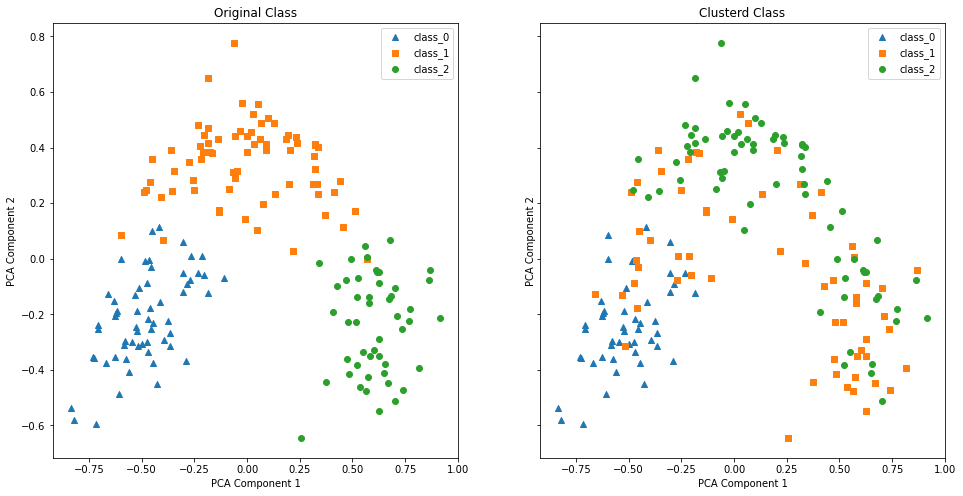

In [19]:
# MinMaxScaler

f, (ax1, ax2) = plt.subplots(figsize=(16,8), ncols=2, nrows=1, sharey=True)
columns = ['target','cluster']
markers=['^','s','o']
asx = [ax1,ax2]
for i,column in enumerate(columns):
    for k, marker in enumerate(markers):
        x_axis_data = wineDF[wineDF[column]==k]['pca_MM_x']
        y_axis_data = wineDF[wineDF[column]==k]['pca_MM_y']
        row, col = int(k/2), k%2
        asx[i].scatter(x_axis_data, y_axis_data, marker=marker, label=wine.target_names[k])
        asx[i].legend()
        asx[i].set_xlabel('PCA Component 1')
        asx[i].set_ylabel('PCA Component 2')
        if i == 0:
            asx[i].set_title('Original Class')
        else:
            asx[i].set_title('Clusterd Class')
plt.show()

In [ ]:
# 여전히 개판임